In [1]:
# SETTINGS

number_topics = 25

# Extract text from a list of URLs

We use the library [Minet](https://github.com/medialab/minet). It's basically command lines; no Python required.

In [2]:
# Install Minet if needed
!pip install minet -U

Requirement already up-to-date: minet in c:\users\mathieu\anaconda3\lib\site-packages (0.51.7)


In [3]:
# Check the input file
import pandas as pd

df = pd.read_csv('00 source data (urls).csv')
df.fillna('', inplace=True)

# /!\ FILTERING
df = df[df['Relevant aktør?'] == 'ja']

# Unpack URLs
rows = []
for index, row in df.iterrows():
    if row['Links til tekst om bæredygtighed']:
        urls = row['Links til tekst om bæredygtighed'].split()
        for url in urls:
            row2 = row.copy()
            row2['Links til tekst om bæredygtighed'] = ''
            row2['article url'] = url
            rows.append(row2)

df = df.append(rows)

# Clean and save
df = df.drop(columns=['Relevant aktør?', 'Links til tekst om bæredygtighed'])
df.to_csv("01 data filtered.csv", index = False, encoding='utf-8')

df

,result #,search engine,query,discourse,language,domain,Manual actor name,article title,article url,article description,total nr of results (best guess),"Type (Kommunal, virksomhed, statslig)",Kommentarer / Er det en relevant kvalitativ case? Hvorfor?
0,0.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,wikipedia,,"Miljø - Wikipedia, den frie encyklopædi",https://da.wikipedia.org/wiki/Milj%C3%B8,,1640000.0,,
1,1.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,mst,,"Miljøstyrelsen | miljø, affald, støj, luft og ...",http://mst.dk/,På Miljøstyrelsens hjemmeside får du viden om ...,1640000.0,Statslig,
4,4.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,mfvm,,"Ministeriet for Fødevarer, Landbrug og Fiskeri...",https://mfvm.dk/,"Den 19. november 2020 er det besluttet, at Mil...",1640000.0,Statslig,
6,5.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,alternativet,,"Klima, miljø og natur // Alternativet",https://alternativet.dk/politik/vores-politik/...,I en cirkulær økonomi tages der ansvar for at ...,1640000.0,Statslig,Links er til PDF-tekster
8,7.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,veluxfoundations,,Miljø - et hav i balance | THE VELUX FOUNDATIONS,https://veluxfoundations.dk/da/det-stoetter-vi...,Andet påvirker havets økosystem på andre måder...,1640000.0,Privat,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,325.0,bing,“Burðardygd” or “burðardygg”,,Faroese,wordpress,Nordic Sustainable Universities Conference,Report from Nordic Sustainable Universities Co...,https://nordicsustainablecampusnetwork.wordpre...,10/28/2016 · um burðardygd byggir eisini á ta ...,95.0,,en rapport fra en konference i 2016. Nordic Su...
1104,343.0,bing,“Burðardygd” or “burðardygg”,,Faroese,miv,,Yrkisskeið nr. 1/06 Heiti: Ferðaleiðari Góðken...,http://www.miv.fo/index.php/ferdhavinna/ferdha...,• Umhvørvið og burðardygg ferðavinna • Rúmliga...,95.0,,Miðnám í Vestmanna tilbyder uddannelse som gui...
1169,,,CSR Greenland,,Greenlandic,brugseni,Brugseni,,https://brugseni.gl/wp-content/uploads/2020/04...,,,,
1187,,,Kistas egne input,,Greenlandic,knr,Inunnguaq Hegelund: kok: lokal mad,,https://visitgreenland.com/da/artikler/madrevo...,"Selvforsynende, lokal mad. Desværre er artikel...",,,


## Download the content of URLs
This command line downloads the HTML of each page in a file identified with a hash key, and adds columns to the CSV "report.csv" with information about the process, as well as the hash key of the corresponding HTML file. Those files are in the "html" folder.

In [4]:
!minet fetch "article url" "01 data filtered.csv" -d html > "02 data with url connection report.csv"

The process cannot access the file because it is being used by another process.


In [5]:
# Check the report file produced
df = pd.read_csv('02 data with url connection report.csv')
df.fillna('', inplace=True)
df

,result #,search engine,query,discourse,language,domain,Manual actor name,article title,article url,article description,total nr of results (best guess),"Type (Kommunal, virksomhed, statslig)",Kommentarer / Er det en relevant kvalitativ case? Hvorfor?,index,resolved,status,error,filename,mimetype,encoding
0,0.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,wikipedia,,"Miljø - Wikipedia, den frie encyklopædi",https://da.wikipedia.org/wiki/Milj%C3%B8,,1640000.0,,,0,,200.0,,73731204-298c-4b55-9f4d-8e5a06bb6372.html,text/html,utf-8
1,4.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,mfvm,,"Ministeriet for Fødevarer, Landbrug og Fiskeri...",https://mfvm.dk/,"Den 19. november 2020 er det besluttet, at Mil...",1640000.0,Statslig,,2,,200.0,,19a0a8d1-03d8-438b-8187-7ad07cf14ad8.html,text/html,utf-8
2,9.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,miljoeportal,,Danmarks Miljøportal Miljoeportalen.dk,https://miljoeportal.dk/,Danmarks Miljøportal satser i vores strategi p...,1640000.0,Privat,,5,,200.0,,94b8406e-3c00-46f2-a4f8-dbd2ec682819.html,text/html,utf-8
3,14.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,aalborg,,Miljø- og Energiforvaltningen - Aalborg Kommune,https://www.aalborg.dk/om-kommunen/organisatio...,"Bæredygtig udvikling, miljøbeskyttelse og affa...",1640000.0,Kommunal,handler mere om bæredygtighed end de andre mil...,6,,200.0,,5f84d092-1994-4309-abbf-2e4eae8a8fc8.html,text/html,utf-8
4,41.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,avl,,Miljø - Aage Vestergaard Larsen A/S - AVL,https://avl.dk/miljo,"Miljø. Miljøet spares gennemsnitlig for 2,4 ki...",1640000.0,privat,,14,,200.0,,d769a764-050a-43d2-aebe-3772ffb44a1b.html,text/html,utf-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,,,,,Danish,klimatilpasning,,tilføjet fra holstebro.dk,https://www.klimatilpasning.dk/viden-om/fremti...,,,statslig,Kan måske være interessant at se nærmere på. T...,484,,200.0,,8ef35c66-7e39-4e96-a1d4-ea7f2eed8056.html,text/html,utf-8
529,81.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,csrkompasset,,Miljø | CSR Kompasset,https://www.csrkompasset.dk/milj%C3%B8-0,Miljø - Luftforurening - Biodiversitet - CO2 u...,1640000.0,privat,,491,,200.0,,d16b284d-03ad-4447-bd6f-cd156457d4f0.html,text/html,utf-8
530,82.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,fmk,,Miljø og Byg - Faaborg-Midtfyn Municipality,https://www.fmk.dk/borger/miljoe-energi-og-aff...,Afdelingen Miljø og Byg i Faaborg-Midtfyn Komm...,1640000.0,kommunal,,495,,200.0,,47149db5-5b9a-4cf7-afe9-ba0dfa930f42.html,text/html,utf-8
531,,,,,Danish,klimatilpasning,,tilføjet fra holstebro.dk,https://www.klimatilpasning.dk/viden-om/fremti...,,,statslig,Kan måske være interessant at se nærmere på. T...,485,,200.0,,fbeba3d0-9fcf-4b73-b7e8-335ccb0fbad4.html,text/html,utf-8


## Extract the text

In [6]:
!minet extract "02 data with url connection report.csv" -i html > "03 data with text content.csv"


Extracting content: 0 docs [00:00, ? docs/s]
Extracting content: 0 docs [00:00, ? docs/s, p=6]
Extracting content: 1 docs [00:02,  2.73s/ docs, p=6]
Extracting content: 7 docs [00:02,  3.28 docs/s, p=6]
Extracting content: 13 docs [00:03,  6.74 docs/s, p=6]
Extracting content: 17 docs [00:03,  9.33 docs/s, p=6]
Extracting content: 22 docs [00:03, 13.17 docs/s, p=6]
Extracting content: 27 docs [00:03, 17.11 docs/s, p=6]
Extracting content: 31 docs [00:03, 20.41 docs/s, p=6]
Extracting content: 35 docs [00:03, 19.95 docs/s, p=6]
Extracting content: 39 docs [00:03, 22.74 docs/s, p=6]
Extracting content: 43 docs [00:03, 23.75 docs/s, p=6]
Extracting content: 47 docs [00:04, 22.37 docs/s, p=6]
Extracting content: 51 docs [00:04, 24.28 docs/s, p=6]
Extracting content: 55 docs [00:04, 27.46 docs/s, p=6]
Extracting content: 59 docs [00:04, 27.92 docs/s, p=6]
Extracting content: 63 docs [00:04, 27.84 docs/s, p=6]
Extracting content: 66 docs [00:04, 27.41 docs/s, p=6]
Extracting content: 69 doc

In [4]:
# Check the contents file produced
df = pd.read_csv('03 data with text content.csv')
df.fillna('', inplace=True)
df

,result #,search engine,query,discourse,language,domain,Manual actor name,article title,article url,article description,...,canonical_url,title,description,raw_content,comments,author,categories,tags,date,sitename
0,33.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,norskov,,Miljø,https://www.norskov.dk/miljo,Nørskov miljø er rigtig gode til at lave en si...,...,,Miljø,Nørskov Miljø hjælper virksomheder med alle ty...,De fleste virksomheder vil gerne have styr på ...,,Pelle P,,MiljøcertificeringMiljøforholdMiljøkortlægning...,,
1,4.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,mfvm,,"Ministeriet for Fødevarer, Landbrug og Fiskeri...",https://mfvm.dk/,"Den 19. november 2020 er det besluttet, at Mil...",...,https://mfvm.dk/index.php?id=15654,Fødevareministeriet og Miljøministeriet,"Den 19. november 2020 er det besluttet, at Mil...","Den 19. november 2020 er det besluttet, at Mil...",,,,,,"Ministeriet for Fødevarer, Landbrug og Fiskeri"
2,0.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,wikipedia,,"Miljø - Wikipedia, den frie encyklopædi",https://da.wikipedia.org/wiki/Milj%C3%B8,,...,https://da.wikipedia.org/wiki/Milj%C3%B8,"Miljø - Wikipedia, den frie encyklopædi",,"Miljø\nMiljø betyder ""omgivelser"" og dækker og...",,Bidragsydere til Wikimedia-projekter,,,2003-01-03,"Wikipedia, den frie encyklopædi"
3,9.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,miljoeportal,,Danmarks Miljøportal Miljoeportalen.dk,https://miljoeportal.dk/,Danmarks Miljøportal satser i vores strategi p...,...,https://miljoeportal.dk/,Danmarks Miljøportal,Danmarks Miljøportal,Seneste nyheder\nInvitation til webinar om Van...,,,,miljøportal|miljøvenlig|Danmarks Miljø|data om...,,Danmarks Miljøportal
4,41.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,avl,,Miljø - Aage Vestergaard Larsen A/S - AVL,https://avl.dk/miljo,"Miljø. Miljøet spares gennemsnitlig for 2,4 ki...",...,https://avl.dk/miljo,Miljø - Aage Vestergaard Larsen A/S,"Miljøet spares for 2,4 kilo CO2 udslip for hve...","Miljø\nMiljøet spares gennemsnitlig for 2,4 ki...",,,,,2019-08-30,AVL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,,,,,Danish,klimatilpasning,,tilføjet fra holstebro.dk,https://www.klimatilpasning.dk/viden-om/fremti...,,...,,Havniveau og klimaforandringer,,Havniveau og klimaforandringer\nOpvarmningen a...,,,,andet|Her markerer man hvis ingen andre emneor...,,
529,51.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,regionh,,Miljø - Region H,https://www.regionh.dk/til-fagfolk/miljoe/en-g...,"Miljø Med FN""s verdensmål som pejlemærke arbej...",...,https://www.regionh.dk/til-fagfolk/miljoe/en-g...,Sådan arbejder vi med cirkulær økonomi,I Region Hovedstaden arbejder vi for en grøn o...,Afsæt i dialog med interessenter\nOmstillingen...,,,,Cirkulær økonomi|Regional udvikling Ressourcee...,2021-04-27,regionh.dk
530,88.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,esbjerg,,Plan & Miljø - Esbjerg,https://www.esbjerg.dk/planer-projekter-og-tra...,Esbjerg Kommunes Plan &amp; Miljøudvalg,...,https://www.esbjerg.dk/planer-projekter-og-tra...,Grøn omstilling af energiforsyningen,Grøn omstilling af energiforsyningen,Grøn omstilling af energiforsyningen\nHer er v...,,,,Grøn omstilling af energiforsyningen|Grøn omst...,2021-03-16,esbjerg.dk
531,26.0,bing,"""miljø*"" AND (“affald” OR “forurening” OR “nat...",,Danish,bane,,GAB Miljø Anlæg | Banedanmark,https://www.bane.dk/da/Om-Banedanmark/Baeredyg...,Håndtering af affald Jordforurening Luftforure...,...,https://www.bane.dk/da/Om-Banedanmark/Baeredyg...,\n\t\t\t\tVi reducerer vores el-forbrug\n\t\t\t,,Vi reducerer vores el-forbrug\nVi forsyner de ...,,,,,,Website


# Group content by actor

In [5]:
actor_dict = {}
for index, row in df.iterrows():
    if row['Manual actor name']:
        actor_id = row['Manual actor name']
    else:
        actor_id = row['domain']
    if actor_id in actor_dict:
        actor_obj = actor_dict[actor_id]
    else:
        actor_obj = {}
        actor_obj['Id'] = actor_id
        actor_obj['urls'] = ''
        actor_obj['text'] = ''
        actor_obj['language'] = row['language']
    
    actor_obj['urls'] = actor_obj['urls'] + str(row['article url']) + ' '
    actor_obj['text'] = actor_obj['text'] + str(row['raw_content']) + ' . '
    
    actor_dict[actor_id] = actor_obj
print("Actor index built.")

Actor index built.


In [6]:
# DOWNLOAD ACTORS
actors_df = pd.DataFrame.from_dict(actor_dict, orient='index')
actors_df.to_csv("04 Actors with text.csv", index = False, encoding='utf-8')
actors_df

,Id,urls,text,language
norskov,norskov,https://www.norskov.dk/miljo https://www.norsk...,De fleste virksomheder vil gerne have styr på ...,Danish
mfvm,mfvm,https://mfvm.dk/ https://mfvm.dk/fileadmin/use...,"Den 19. november 2020 er det besluttet, at Mil...",Danish
wikipedia,wikipedia,https://da.wikipedia.org/wiki/Milj%C3%B8 https...,"Miljø\nMiljø betyder ""omgivelser"" og dækker og...",Danish
miljoeportal,miljoeportal,https://miljoeportal.dk/ https://miljoeportal....,Seneste nyheder\nInvitation til webinar om Van...,Danish
avl,avl,https://avl.dk/miljo https://avl.dk/miljo,"Miljø\nMiljøet spares gennemsnitlig for 2,4 ki...",Danish
...,...,...,...,...
Brugseni,Brugseni,https://brugseni.gl/gl/csr/ https://brugseni.g...,Brugsenimi takorluugarput piujuartitsilluni in...,Greenlandic
Tora guides,Tora guides,https://tora.fo/da/about-us/,Dine personlige data vil blive at at have din ...,Faroese
Inunnguaq Hegelund: kok: lokal mad,Inunnguaq Hegelund: kok: lokal mad,https://knr.gl/kl/nutaarsiassat/nutaanik-malit...,Inuussutissat suliarineqarsimasut ilaat kalaal...,Greenlandic
Vores fisk/aalisagaativut,Vores fisk/aalisagaativut,https://naalakkersuisut.gl/~/media/Nanoq/Files...,.,Greenlandic


# LDA: extract topics

In [7]:
import pandas as pd
# This is for text mining
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [8]:
# Source file (CSV)
source_file = "04 Actors with text.csv"
text_col_name = "text"

# More features is more dimensions for each document. You should probably keep it at 1000.
no_features = 1000

In [9]:
# LOAD DATA
documents_dictionary = {}
df = pd.read_csv(source_file)

for index, row in df.iterrows():
    key = row['Id']
    text = str(row[text_col_name])
    if len(text)>10:
        documents_dictionary[key] = text

In [10]:
# LOAD STOP WORDS
import csv
stopwords = []
with open('stopwords-en-dk-is.txt', 'r') as fd:
    reader = csv.reader(fd)
    for row in reader:
        word = row[0]
        stopwords.append(word)
print("Stop words loaded. Ex:", stopwords[0], stopwords[1], stopwords[2],"...")

Stop words loaded. Ex: i me my ...


In [11]:
# COMPUTE LDA TOPICS
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=stopwords)
tf = tf_vectorizer.fit_transform(documents_dictionary.values())
tf_feature_names = tf_vectorizer.get_feature_names()
lda = LatentDirichletAllocation(n_components=number_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
print("LDA topics computed.")

LDA topics computed.


In [12]:
# DISPLAY RESULTS (for monitoring)
no_top_words = 25 # How many words to keep for each topic (there may be many)

# Create a data frame for convenience (for download, actually)
topics_df = pd.DataFrame(columns=['topic','word','weight'])

# Display topics to check it works. For each topic, we only display the top words.
i = 0
for topic_idx, topic in enumerate(lda.components_):
    print("# TOPIC_%d:" % (topic_idx))
    for j in topic.argsort()[:-no_top_words - 1:-1]:
        print(str(topic[j]) + "   " + tf_feature_names[j])
        topics_df.loc[i] = ["TOPIC_"+str(topic_idx), tf_feature_names[j], topic[j]]
        i = i+1
    print(" ")

topics_df

# TOPIC_0:
16.42822623150142   2021
5.969345352544222   kommune
4.9226244076704155   marts
3.191973619722377   etablering
2.926676177812214   19
2.745281829021454   april
2.681025355721419   16
2.6665081307634186   læs
2.5665479707623406   12
2.295231288467143   um
2.073801417706474   18
2.071083575537687   sum
2.0198851110887066   15
1.9236925011577097   11
1.9229320171652684   70
1.822640057091762   23
1.8139673430278103   ofte
1.6355397537537153   03
1.555374587386132   fyri
1.5440333984560215   forhold
1.4394622224256637   25
1.4374163027927265   út
1.4261769173445367   av
1.4058322062249384   forbindelse
1.3643979713511052   40
 
# TOPIC_1:
688.7206194266087   av
687.4645443890234   um
615.2044937372083   sum
605.5632585439239   fyri
313.8433628032021   hevur
296.4221562439363   tað
284.2863180615551   ella
273.7759590424407   ið
245.29506133712303   ein
234.2863024480699   hava
230.98398155836162   ikki
225.94146546401544   vit
219.92303973479883   kann
200.98795894908142   hetta

0.8809221329075837   arbejder
0.8470080374983298   verdensmålene
0.8383318974617368   arbejde
0.8244598519920854   verden
0.8154629867901526   fokus
0.7988823387322058   co2
0.7915374447968909   bæredygtighed
0.7821592630614256   kunder
0.7821139318656263   løsninger
0.7816981361139302   fn
0.7534585046068916   danmark
0.7399709075296962   samfundet
0.719706676930167   virksomheder
0.7162153363838267   fremtidens
0.7125965673074944   del
0.6958294860855238   2015
0.6950135362681741   miljøet
0.6891076423125836   danmarks
0.6852073150601512   emballage
 
# TOPIC_14:
1.7460081566827226   sum
1.5141721219317346   hava
1.3857800171357149   vit
1.2199672069355645   fyri
1.2095667015901532   okkara
1.2053410024728326   ið
1.13979824292328   verdensmål
1.023150274282446   tað
1.012508831473652   um
1.005969524947476   grønne
0.9491725869303794   bæredygtig
0.9375445996528635   ein
0.8863070675922531   aalborg
0.8614508062724182   grøn
0.8391521360100572   arbejde
0.8331471526884779   verdensm

,topic,word,weight
0,TOPIC_0,2021,16.428226
1,TOPIC_0,kommune,5.969345
2,TOPIC_0,marts,4.922624
3,TOPIC_0,etablering,3.191974
4,TOPIC_0,19,2.926676
...,...,...,...
620,TOPIC_24,fn,0.896428
621,TOPIC_24,ið,0.891302
622,TOPIC_24,tryggja,0.857522
623,TOPIC_24,øllum,0.846496


In [13]:
# COMPUTE DOC x TOPIC RELATIONS (network)
# We create a data frame to store the content. It looks like a matrix.
df_matrix_style = pd.DataFrame(columns=['doc']+[("TOPIC_"+str(i)) for i in range(0,number_topics)])

# We create a second data frame with the same data. It looks like a list.
# Depending on what you want to do, one or the other are most convenient.
df_list_style = pd.DataFrame(columns=['doc', 'topic', 'weight'])

doc_topic = lda.transform(tf)
docs = list(documents_dictionary.keys())
topic_index = {}
i1 = 0
i2 = 0
for j in range(len(docs)):
    key = docs[j]
    topic_weights = list(doc_topic[j])
    
    # Index
    topic_index[key] = topic_weights
    
    # Matrix style
    df_matrix_style.loc[i1] = [key]+topic_weights
    i1 = i1+1
    
    # List style
    for k, w in enumerate(topic_weights):
        df_list_style.loc[i2] = [key, "TOPIC_"+str(k), w]
        i2 = i2+1

print("Done.")

Done.


In [14]:
# Output articles & topics, matrix style, to check that it works:
df_matrix_style

,doc,TOPIC_0,TOPIC_1,TOPIC_2,TOPIC_3,TOPIC_4,TOPIC_5,TOPIC_6,TOPIC_7,TOPIC_8,...,TOPIC_15,TOPIC_16,TOPIC_17,TOPIC_18,TOPIC_19,TOPIC_20,TOPIC_21,TOPIC_22,TOPIC_23,TOPIC_24
0,norskov,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305,...,0.000305,0.000305,0.000305,0.000305,0.992672,0.000305,0.000305,0.000305,0.000305,0.000305
1,mfvm,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,...,0.004000,0.206447,0.004000,0.004000,0.701553,0.004000,0.004000,0.004000,0.004000,0.004000
2,wikipedia,0.000048,0.000048,0.000048,0.000048,0.000048,0.000048,0.000048,0.000048,0.000048,...,0.000048,0.000048,0.000048,0.000048,0.526704,0.000048,0.000048,0.000048,0.000048,0.000048
3,miljoeportal,0.001818,0.001818,0.001818,0.001818,0.001818,0.001818,0.001818,0.001818,0.001818,...,0.001818,0.001818,0.001818,0.001818,0.366666,0.001818,0.001818,0.001818,0.001818,0.001818
4,avl,0.000191,0.000191,0.000191,0.000191,0.000191,0.000191,0.000191,0.000191,0.000191,...,0.000191,0.000191,0.000191,0.000191,0.995407,0.000191,0.000191,0.000191,0.000191,0.000191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,Polar Trophy Hunt,0.002105,0.002105,0.002105,0.002105,0.002105,0.002105,0.002105,0.002105,0.002105,...,0.002105,0.949474,0.002105,0.002105,0.002105,0.002105,0.002105,0.002105,0.002105,0.002105
299,Brugseni,0.001250,0.001250,0.001250,0.001250,0.001250,0.416393,0.001250,0.001250,0.001250,...,0.001250,0.001250,0.001250,0.425126,0.001250,0.001250,0.001250,0.047965,0.001250,0.001250
300,Tora guides,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,...,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
301,Inunnguaq Hegelund: kok: lokal mad,0.000235,0.000235,0.000235,0.000235,0.000235,0.174187,0.000235,0.000235,0.000235,...,0.000235,0.000235,0.000235,0.000235,0.820401,0.000235,0.000235,0.000235,0.000235,0.000235


In [15]:
# Output articles & topics, list style, to check that it works:
df_list_style

,doc,topic,weight
0,norskov,TOPIC_0,0.000305
1,norskov,TOPIC_1,0.000305
2,norskov,TOPIC_2,0.000305
3,norskov,TOPIC_3,0.000305
4,norskov,TOPIC_4,0.000305
...,...,...,...
7570,csrkompasset,TOPIC_20,0.000074
7571,csrkompasset,TOPIC_21,0.000074
7572,csrkompasset,TOPIC_22,0.000074
7573,csrkompasset,TOPIC_23,0.000074


In [16]:
# DOWNLOAD LDA results
# Note: these files can be used in Tableau or Table2Net to build various visualizations.

topics_df.to_csv("05-a LDA topics and their words.csv", index = False, encoding='utf-8')
# df_matrix_style.to_csv("05-? LDA actors and topics matrix.csv", index = False, encoding='utf-8')
df_list_style.to_csv("05-b LDA actors and topics list style.csv", index = False, encoding='utf-8')

In [17]:
# ENRICH FILE (and monitor new version)
for topic_id, topic in enumerate(lda.components_):
    colname = "topic_"+str(topic_id)
    values = []
    for index, row in df.iterrows():
        key = row['Id']
        if key in topic_index:
            val = topic_index[key][topic_id]
        else:
            val = 0
        values.append(val)
    df.insert(len(df.columns), colname, values)
df

,Id,urls,text,language,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,...,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24
0,norskov,https://www.norskov.dk/miljo https://www.norsk...,De fleste virksomheder vil gerne have styr på ...,Danish,0.000305,0.000305,0.000305,0.000305,0.000305,0.000305,...,0.000305,0.000305,0.000305,0.000305,0.992672,0.000305,0.000305,0.000305,0.000305,0.000305
1,mfvm,https://mfvm.dk/ https://mfvm.dk/fileadmin/use...,"Den 19. november 2020 er det besluttet, at Mil...",Danish,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,...,0.004000,0.206447,0.004000,0.004000,0.701553,0.004000,0.004000,0.004000,0.004000,0.004000
2,wikipedia,https://da.wikipedia.org/wiki/Milj%C3%B8 https...,"Miljø\nMiljø betyder ""omgivelser"" og dækker og...",Danish,0.000048,0.000048,0.000048,0.000048,0.000048,0.000048,...,0.000048,0.000048,0.000048,0.000048,0.526704,0.000048,0.000048,0.000048,0.000048,0.000048
3,miljoeportal,https://miljoeportal.dk/ https://miljoeportal....,Seneste nyheder\nInvitation til webinar om Van...,Danish,0.001818,0.001818,0.001818,0.001818,0.001818,0.001818,...,0.001818,0.001818,0.001818,0.001818,0.366666,0.001818,0.001818,0.001818,0.001818,0.001818
4,avl,https://avl.dk/miljo https://avl.dk/miljo,"Miljø\nMiljøet spares gennemsnitlig for 2,4 ki...",Danish,0.000191,0.000191,0.000191,0.000191,0.000191,0.000191,...,0.000191,0.000191,0.000191,0.000191,0.995407,0.000191,0.000191,0.000191,0.000191,0.000191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,Brugseni,https://brugseni.gl/gl/csr/ https://brugseni.g...,Brugsenimi takorluugarput piujuartitsilluni in...,Greenlandic,0.001250,0.001250,0.001250,0.001250,0.001250,0.416393,...,0.001250,0.001250,0.001250,0.425126,0.001250,0.001250,0.001250,0.047965,0.001250,0.001250
325,Tora guides,https://tora.fo/da/about-us/,Dine personlige data vil blive at at have din ...,Faroese,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,...,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
326,Inunnguaq Hegelund: kok: lokal mad,https://knr.gl/kl/nutaarsiassat/nutaanik-malit...,Inuussutissat suliarineqarsimasut ilaat kalaal...,Greenlandic,0.000235,0.000235,0.000235,0.000235,0.000235,0.174187,...,0.000235,0.000235,0.000235,0.000235,0.820401,0.000235,0.000235,0.000235,0.000235,0.000235
327,Vores fisk/aalisagaativut,https://naalakkersuisut.gl/~/media/Nanoq/Files...,.,Greenlandic,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
# DOWNLOAD ENRICHED FILE
df.drop(columns=[text_col_name]).to_csv("06 Actors and their topics.csv", index=False)

# Export LDA networks

In [19]:
# Export network of words and topics
import networkx as nx
G = nx.Graph()
for index, row in topics_df.iterrows():
    topic = 'T_'+str(row['topic'])
    word = 'W_'+str(row['word'])
    w = row['weight']
    
    G.add_edge(topic, word)
    G[topic][word]['weight'] = w
    
    G.nodes[topic]['label'] = str(row['topic'])
    G.nodes[topic]['type'] = 'topic'
    G.nodes[word]['label'] = str(row['word'])
    G.nodes[word]['type'] = 'word'
    
nx.write_gexf(G, "07 Words and topics.gexf")

In [20]:
# Export network of actors and topics
import networkx as nx
threshold = 0.001
G = nx.Graph()
for index, row in df_list_style.iterrows():
    topic = 'T_'+str(row['topic'])
    actor = 'A_'+str(row['doc'])
    w = row['weight']
    
    if w > threshold:
        G.add_edge(topic, actor)
        G[topic][actor]['weight'] = w

        G.nodes[topic]['label'] = str(row['topic'])
        G.nodes[topic]['type'] = 'topic'
        G.nodes[actor]['label'] = str(row['doc'])
        G.nodes[actor]['type'] = 'actor'
    
nx.write_gexf(G, "08 Actors and topics.gexf")

# UMAP after the topics

In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import umap

In [22]:
# Load data
df = pd.read_csv("06 Actors and their topics.csv")
df = df.dropna()

In [23]:
# Prepare data
reducer = umap.UMAP()
umap_data = df[
    [
        "topic_0",
        "topic_1",
        "topic_2",
        "topic_3",
        "topic_4",
        "topic_5",
        "topic_6",
        "topic_7",
        "topic_8",
        "topic_9",
        "topic_10",
        "topic_11",
        "topic_12",
        "topic_13",
        "topic_14",
        "topic_15",
        "topic_16",
        "topic_17",
        "topic_18",
        "topic_19",
        "topic_20",
        "topic_21",
        "topic_22",
        "topic_23",
        "topic_24"
    ]
].values
scaled_umap_data = StandardScaler().fit_transform(umap_data)

In [24]:
# Compute embedding
embedding = reducer.fit_transform(scaled_umap_data)
embedding.shape

(329, 2)

Text(0.5, 1.0, 'UMAP projection of the dataset')

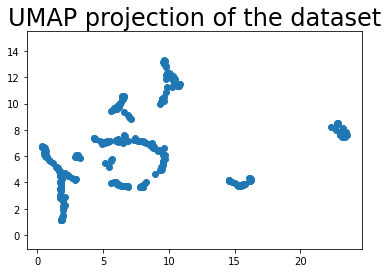

In [25]:
# Monitor embedding
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)

In [26]:
# Enrich source and download
xvalues = []
yvalues = []
for index, row in df.iterrows():
    coord = embedding[index]
    xvalues.append(coord[0])
    yvalues.append(coord[1])
df.insert(len(df.columns), 'X-UMAP', xvalues)
df.insert(len(df.columns), 'Y-UMAP', yvalues)

df.to_csv("09 Actors with topics + UMAP layout.csv", index = False, encoding='utf-8')